# Statistics - Exploratory Data Analysis

- Histogram plots
- Scatter plots
- Percentiles
- Boxplots
- Violin
- Heatmaps
- Barplots
- Factor plots
- Density plots
- Joint Distribution plots

In [1]:
import pandas as pd
import numpy as np

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/winequalityN.csv"
df = pd.read_csv(file_name)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Simple Descriptive Analysis

In [2]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df["alcohol"].mean()

10.491800831149511

# Let's start plotting using a Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77ef071990>]],
      dtype=object)

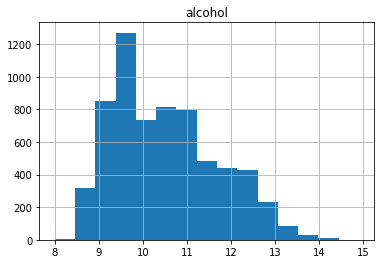

In [5]:
df.hist(column='alcohol', bins=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77e8a33310>]],
      dtype=object)

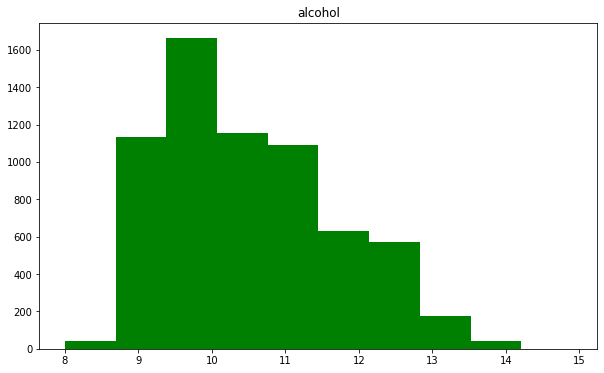

In [6]:
# Let's get a bit more advanced and learn to customize your plots

df.hist(column='alcohol', bins=10, grid=False, figsize=(10,6), color='green')

# Using the library Seaborn, we can quickly produce even nicer plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


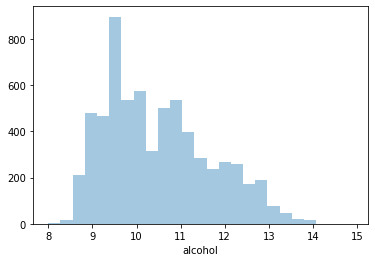

In [7]:
import seaborn as sns

sns.distplot(df['alcohol'], bins=25, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


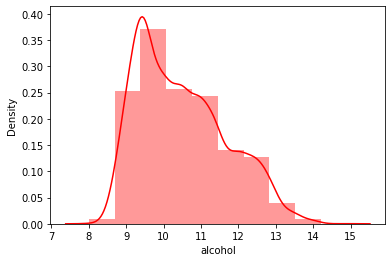

In [8]:
sns.distplot(df.alcohol, bins=10, kde=True, color="red")

In [12]:
df["alcohol"].value_counts(ascending=False).head()

9.5     367
9.4     332
9.2     271
10.0    229
10.5    227
Name: alcohol, dtype: int64

# Styling and Axis Labels
https://seaborn.pydata.org/tutorial/aesthetics.html?highlight=style

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


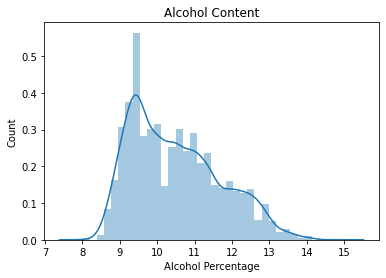

In [13]:
# Let's start with labeling our axis

import matplotlib.pyplot as plt

_ = sns.distplot(df.alcohol)
_ = plt.xlabel('Alcohol Percentage')
_ = plt.ylabel('Count')
_ = plt.title("Alcohol Content")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


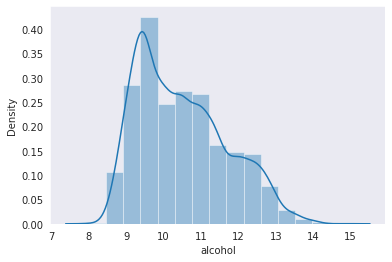

In [14]:
#Use sns.set_style() to control styling

sns.set_style("dark")
sns.distplot(df.alcohol, bins=15)

# Scatter Plots

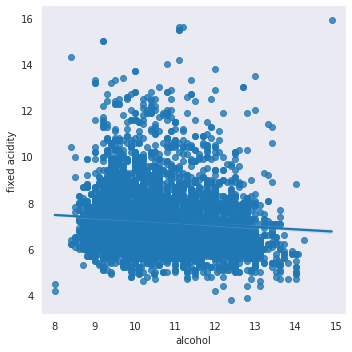

In [18]:
sns.lmplot(x='alcohol', y='fixed acidity', data=df)

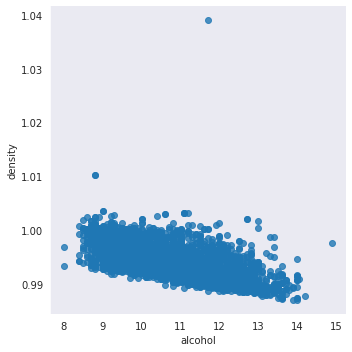

In [16]:
sns.lmplot(x='alcohol', y='density', data=df, fit_reg=False)

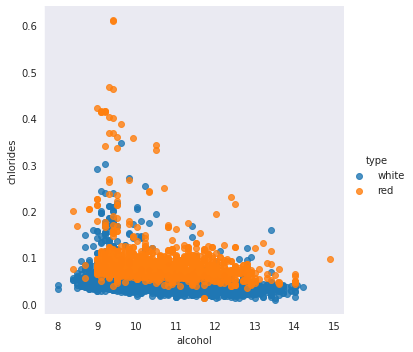

In [20]:
# Scatterplot arguments
sns.lmplot(x='alcohol', y='chlorides', data=df,
           fit_reg=False, # Remove the regression line
           hue='type')   # Color by type

# Understanding Percentiles

In [21]:
# The quantile function 

print(df["alcohol"].quantile(0.1))
print(df["alcohol"].quantile(0.5))
print(df["alcohol"].quantile(0.9))
print(df["alcohol"].quantile(0.99))

9.1
10.3
12.3
13.4


In [22]:
# What's the max alcohol value though?
df["alcohol"].max()

14.9

In [23]:
# Quantile ranges

df["alcohol"].quantile(([0.05, 0.95]))

0.05     9.0
0.95    12.7
Name: alcohol, dtype: float64

# Boxplots & Finding Outliers

https://seaborn.pydata.org/generated/seaborn.boxplot.html

![alt text](https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png)

“maximum”: Q3 + 1.5*IQR

“minimum”: Q1 -1.5*IQR

0.25     9.5
0.75    11.3
Name: alcohol, dtype: float64


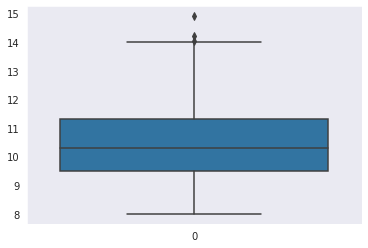

In [24]:
print(df["alcohol"].quantile(([0.25, 0.75])))
sns.boxplot(data=df['alcohol'])

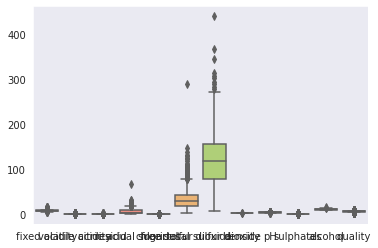

In [25]:
sns.boxplot(data=df, palette="Set3")

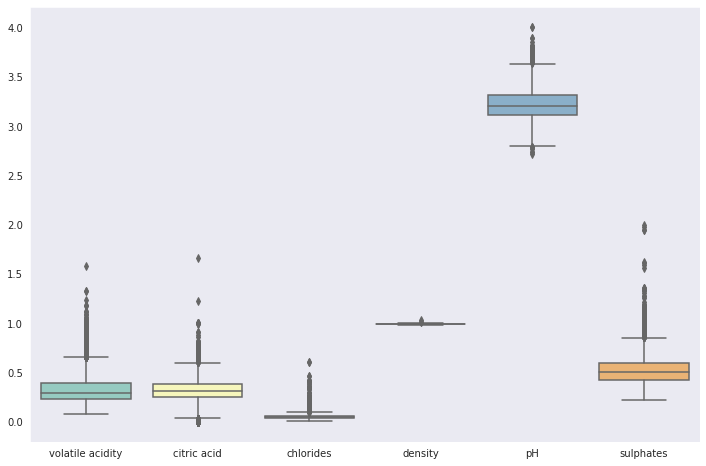

In [26]:
from matplotlib import pyplot as plt

# Enlarge the plot
plt.figure(figsize=(12,8))

summary = df.drop(['free sulfur dioxide', 'total sulfur dioxide', 'quality',
                   'residual sugar', 'fixed acidity', 'alcohol'], axis=1)
sns.boxplot(data=summary, palette="Set3")

# Violin Plots

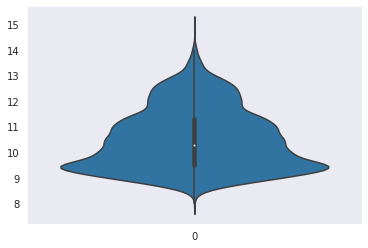

In [27]:
sns.violinplot(data=df['alcohol'])

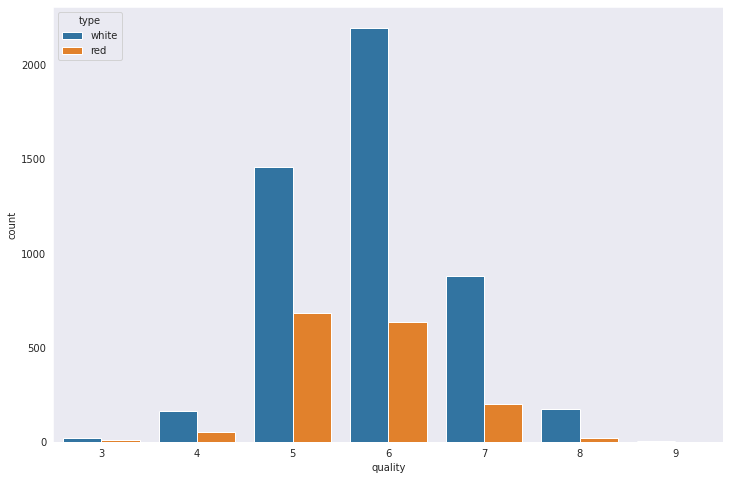

In [30]:
# Bar Plot

# Enlarge the plot
plt.figure(figsize=(12,8))

sns.countplot(x='quality', data=df, hue='type')

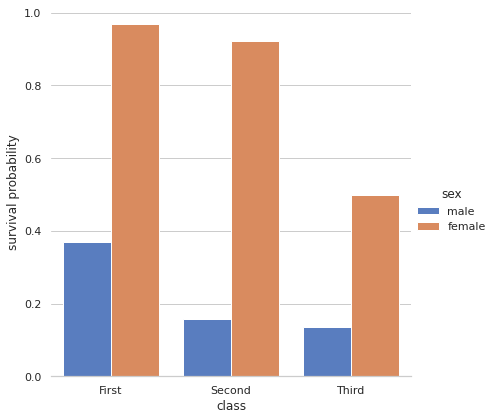

In [39]:
# Titanic Example

sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted", ci=None)
g.despine(left=True)
g.set_ylabels("survival probability")

In [36]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


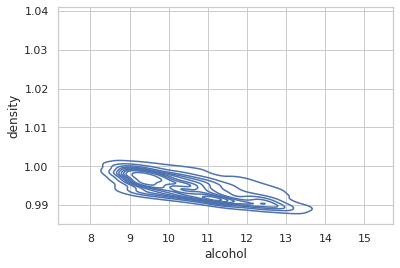

In [40]:
# Density Plot
sns.kdeplot(df.alcohol, df.density)

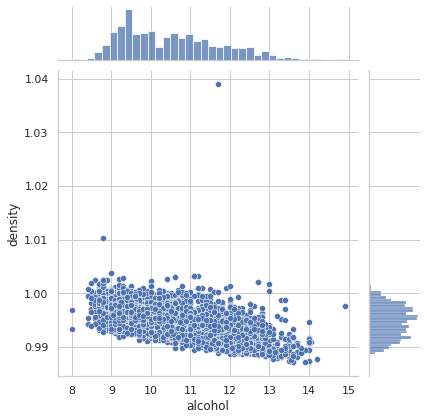

In [41]:
# Joint Distribution Plot

sns.jointplot(x='alcohol', y='density', data=df)

# Factor Plots and Bee Swarm Plots

Factor plots allow us to create separate plots by categorical classes.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


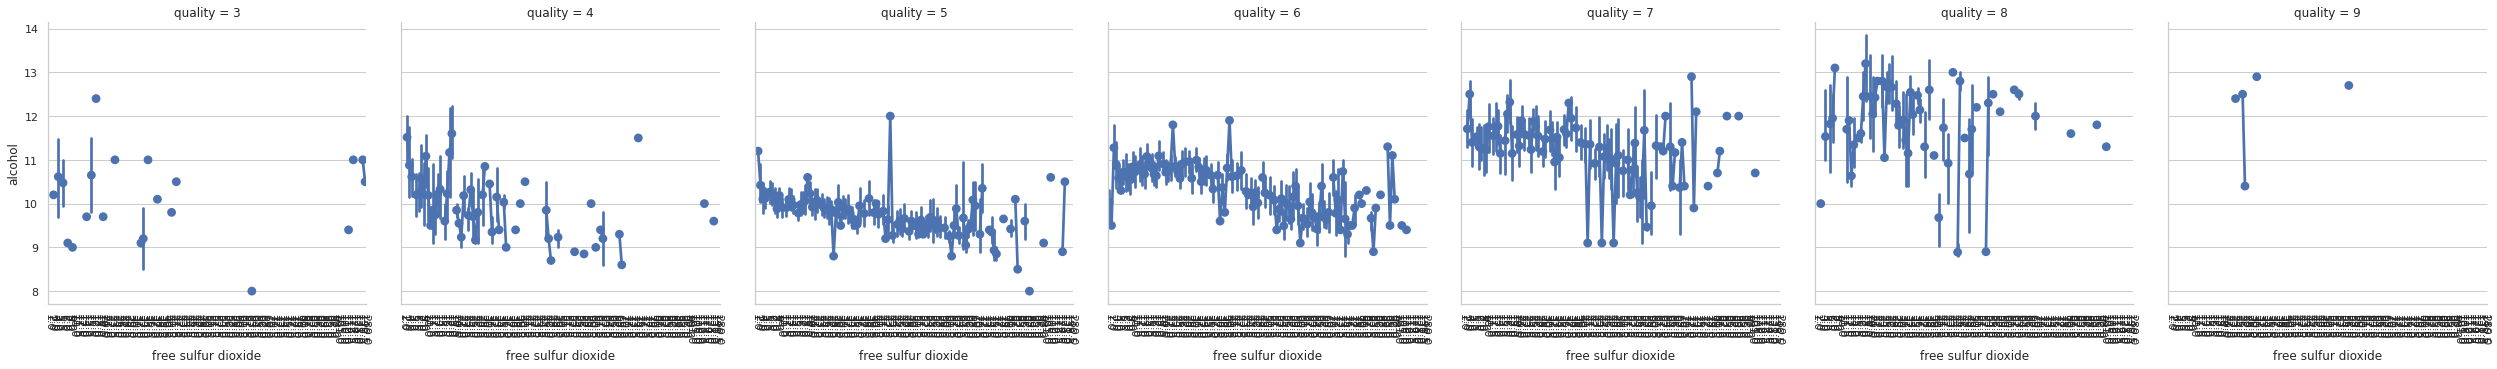

In [43]:
# Factor Plot
g = sns.factorplot(x='free sulfur dioxide', 
                   y='alcohol', 
                   data=df, 
                   # A recent update in Matplotlib broke how the hue argument works in Seaborn with some plots see: https://github.com/mwaskom/seaborn/issues/1697
                   #hue='quality',  # Color by stage
                   col='quality',  # Separate by stage
                   kind='point') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-90)

# Creating Empirical cumulative distribution function (ECDF)


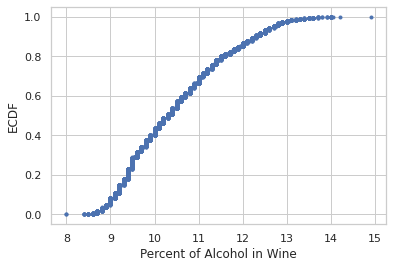

In [44]:
import numpy as np

x = np.sort(df['alcohol'])
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.05)
_ = plt.xlabel('Percent of Alcohol in Wine') 
_ = plt.ylabel('ECDF') 
plt.grid(True)
plt.show()

In [45]:
print(df["alcohol"].quantile(([0.2, 0.8])))

0.2     9.4
0.8    11.5
Name: alcohol, dtype: float64
